# Análisis univariado

## Explorando una variable categórica

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [3]:
df = palmerpenguins.load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Conteos y proporciones

#### Preludio: ¿Qué estadísticos describen el conjunto de datos? 

###### Todas las variables

In [4]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


###### Solo variables númericas

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


###### Solo variables categoricas

In [6]:
df.describe(include='O')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [7]:
df.astype({
    'species' : 'category',
    'island' : 'category',
    'sex' : 'category'
}).describe(include='category')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


#### ¿Cómo visualizar los conteos?

##### Pandas

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


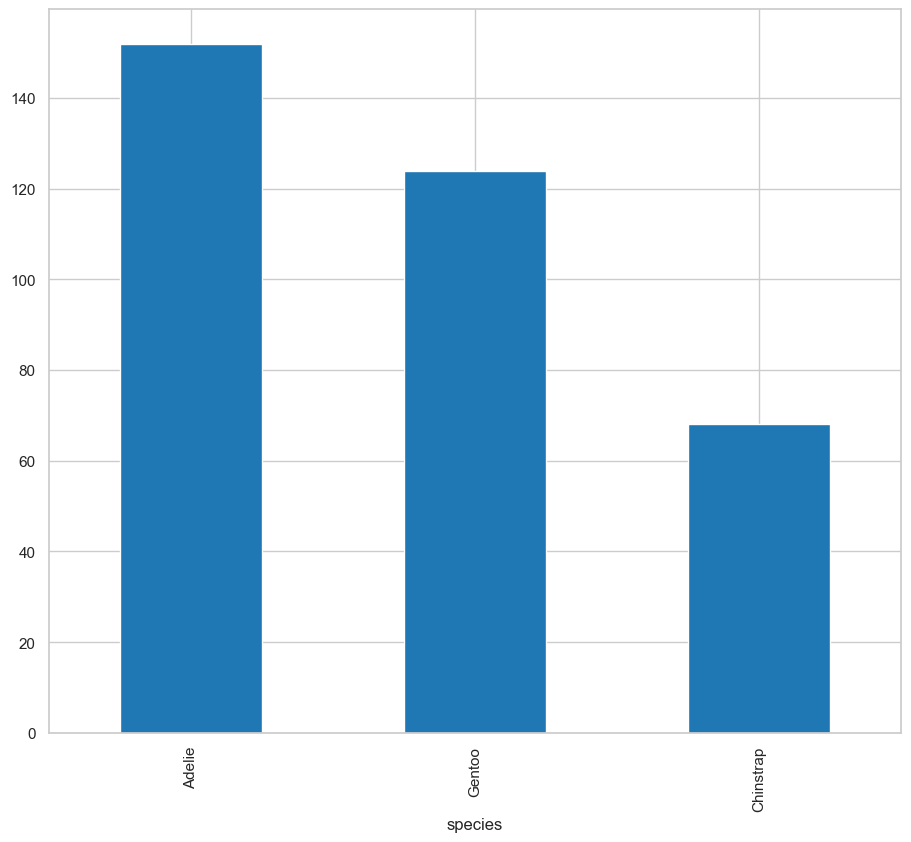

In [8]:
df['species'].value_counts().plot(kind='bar')
plt.show()

##### Seaborn

C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\3796119644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='species', kind='count', palette=penguin_color)


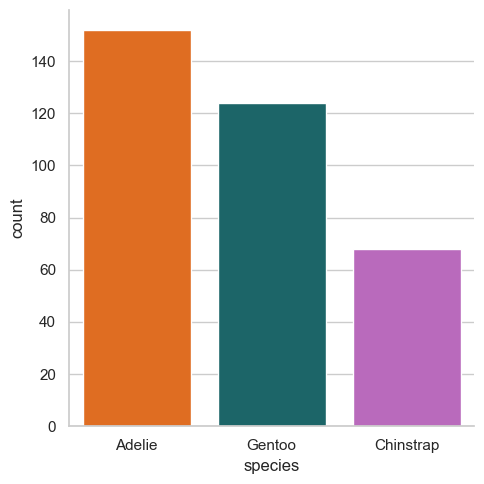

In [9]:
sns.catplot(data=df, x='species', kind='count', palette=penguin_color)
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\3297195145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df.value_counts('species', sort=True).reset_index(name='count').pipe(lambda df1 : (sns.barplot (data=df1, x='species', y='count', palette=penguin_color)))


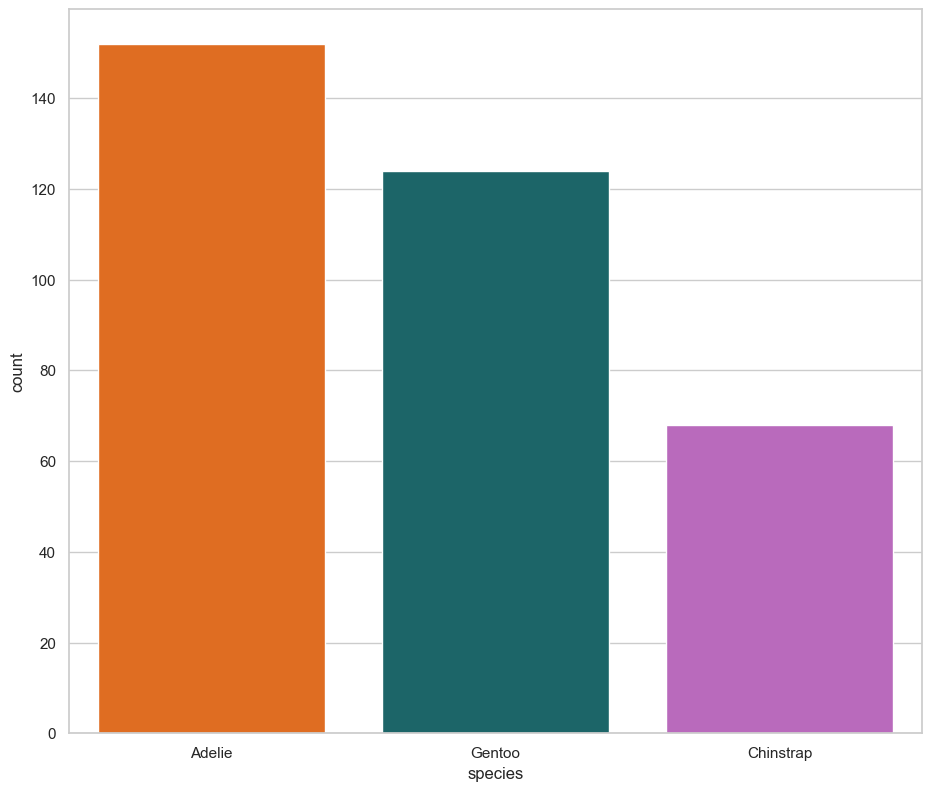

In [10]:
df.value_counts('species', sort=True).reset_index(name='count').pipe(lambda df1 : (sns.barplot (data=df1, x='species', y='count', palette=penguin_color)))
plt.show()

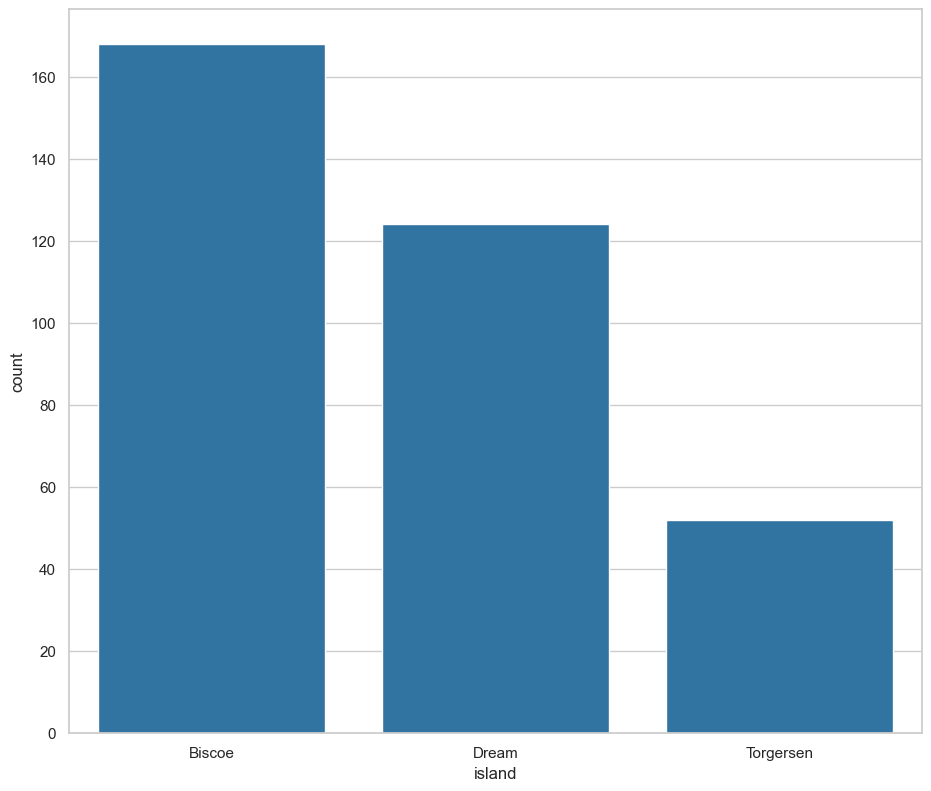

In [11]:
df.value_counts('island', sort=True).reset_index(name='count').pipe(lambda df1 : (sns.barplot (data=df1, x='island', y='count')))
plt.show()

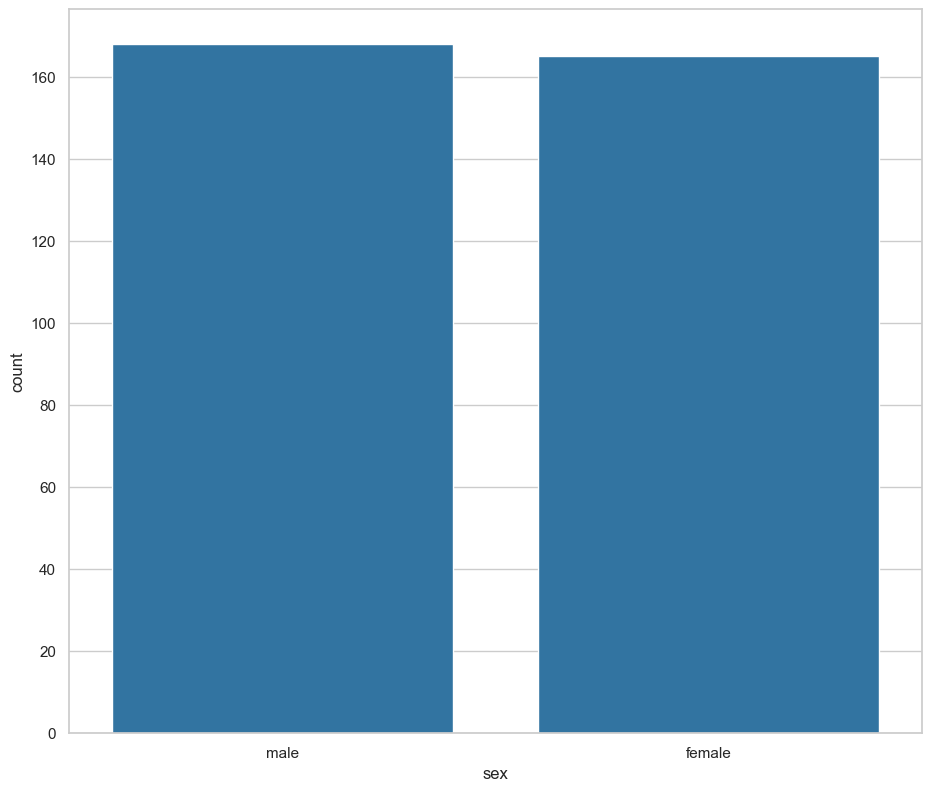

In [12]:
df.value_counts('sex', sort=True).reset_index(name='count').pipe(lambda df1 : (sns.barplot (data=df1, x='sex', y='count')))
plt.show()

#### ¿Cómo visualizar las proporciones?

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


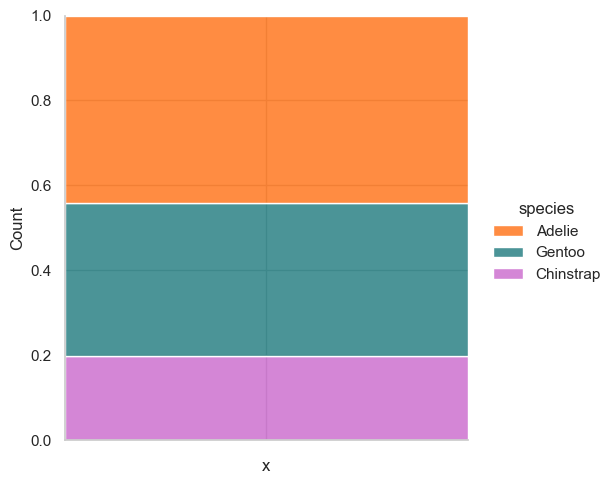

In [13]:
df.add_column('x', '').pipe(lambda df1: (sns.displot(data=df1, x='x', hue='species', multiple='fill', palette=penguin_color)))
plt.show()

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


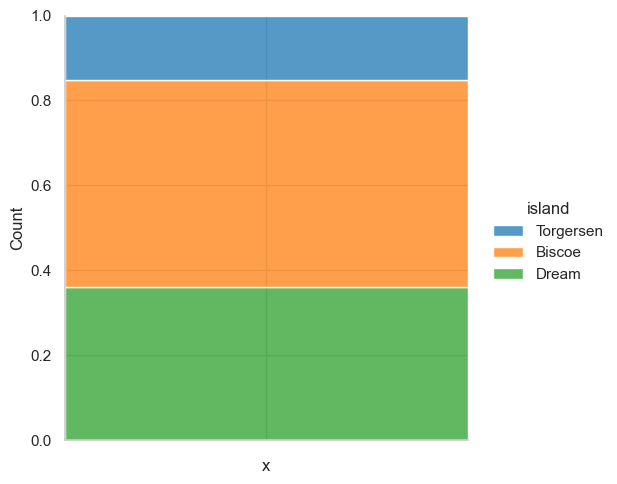

In [14]:
df.add_column('x', '').pipe(lambda df1: (sns.displot(data=df1, x='x', hue='island', multiple='fill')))
plt.show()

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


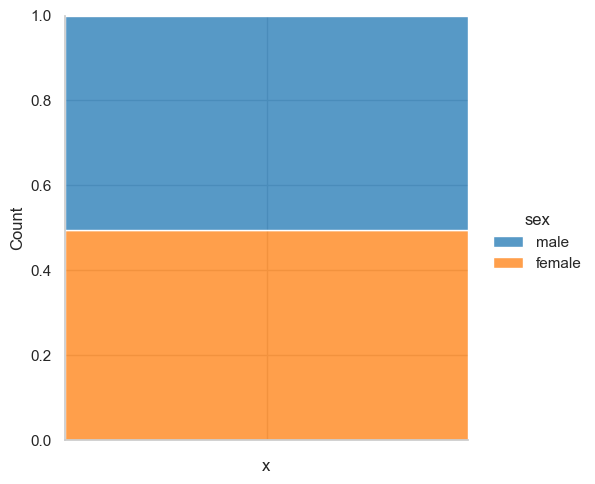

In [15]:
df.add_column('x', '').pipe(lambda df1: (sns.displot(data=df1, x='x', hue='sex', multiple='fill')))
plt.show()

## Estadística descriptiva aplicada

### Medidas de tendecnia central

#### Media o promedio

In [16]:
df['bill_depth_mm'].mean()

17.151169590643274

In [17]:
np.mean(df['bill_depth_mm'])

17.151169590643274

In [18]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

#### Mediana

In [19]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].median()

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

#### Moda

In [20]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].mode()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,41.1,17.0,190.0,3800.0,2009


In [21]:
df.describe(include=object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


### Medidas de dispersión

#### ¿Cuál es el valor máximo de las variables?

In [22]:
df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

#### ¿Cuál es el valor mínimo de las variables?

In [23]:
df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

#### ¿Cuál es el rango de las variables?

In [24]:
df.max(numeric_only=True) - df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

#### ¿Cuál es la desviación estándar de las variables? 

In [25]:
df.std(numeric_only=True)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

In [26]:
df.mean(numeric_only=True) - df.std(numeric_only=True)

bill_length_mm         38.462346
bill_depth_mm          15.176376
flipper_length_mm     186.853491
body_mass_g          3399.799850
year                 2007.210714
dtype: float64

In [27]:
df.mean(numeric_only=True) + df.std(numeric_only=True)

bill_length_mm         49.381514
bill_depth_mm          19.125963
flipper_length_mm     214.976918
body_mass_g          5003.708922
year                 2008.847426
dtype: float64

#### ¿Cuál es el rango intercuartílico?

In [28]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(0.25)

bill_length_mm         39.225
bill_depth_mm          15.600
flipper_length_mm     190.000
body_mass_g          3550.000
year                 2007.000
Name: 0.25, dtype: float64

In [29]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(0.75)

bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

In [30]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(0.75) - df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(0.25)

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
year                    2.000
dtype: float64

In [31]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(q=[0.25,0.50,0.75])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0.25,39.225,15.6,190.0,3550.0,2007.0
0.50,44.450,17.3,197.0,4050.0,2008.0
0.75,48.500,18.7,213.0,4750.0,2009.0


In [32]:
df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','year']].quantile(q=[0.25,0.50,0.75]).transpose().rename_axis('variable').reset_index().assign(iqr= lambda df1: df1[0.75] - df1[0.25])

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.225,44.45,48.5,9.275
1,bill_depth_mm,15.600,17.30,18.7,3.100
2,flipper_length_mm,190.000,197.00,213.0,23.000
3,body_mass_g,3550.000,4050.00,4750.0,1200.000
4,year,2007.000,2008.00,2009.0,2.000


#### ¿Cómo puedo visualizar la distribución de una variable?

##### Histograma

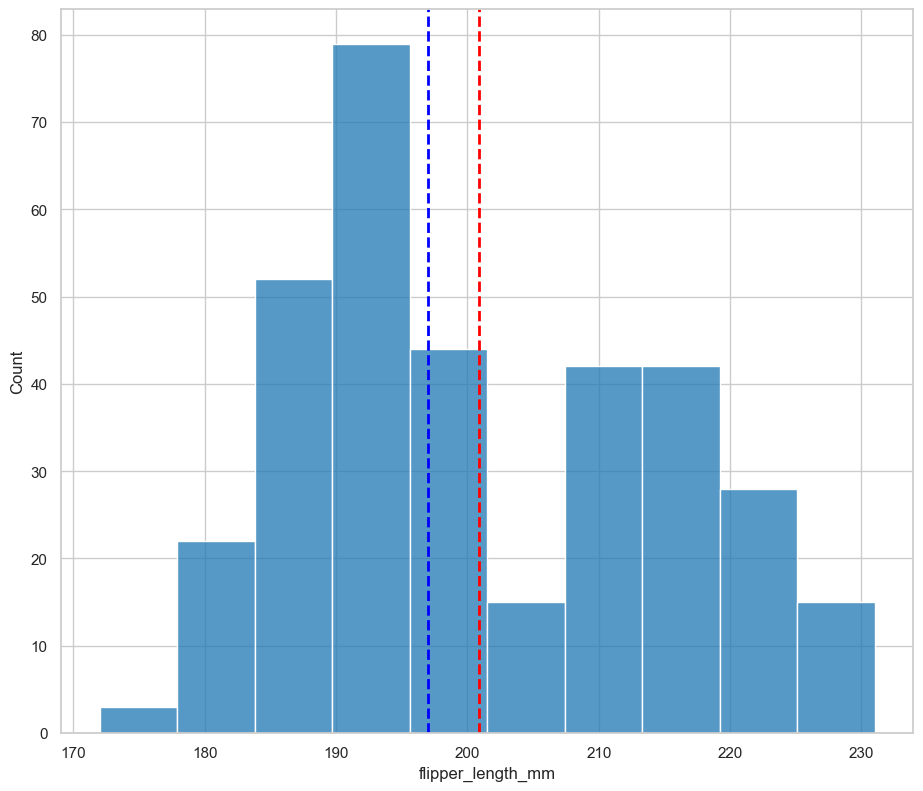

In [33]:
sns.histplot(data=df, x='flipper_length_mm')
plt.axvline(x=df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=df['flipper_length_mm'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

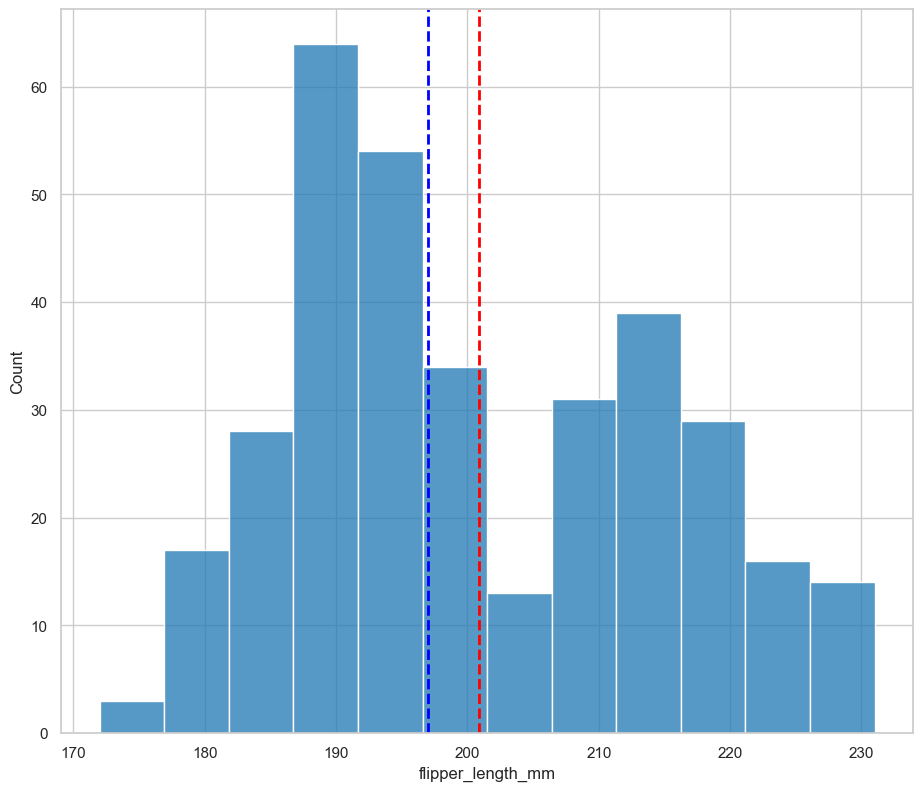

In [34]:
sns.histplot(data=df, x='flipper_length_mm', binwidth=5)
plt.axvline(x=df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=df['flipper_length_mm'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

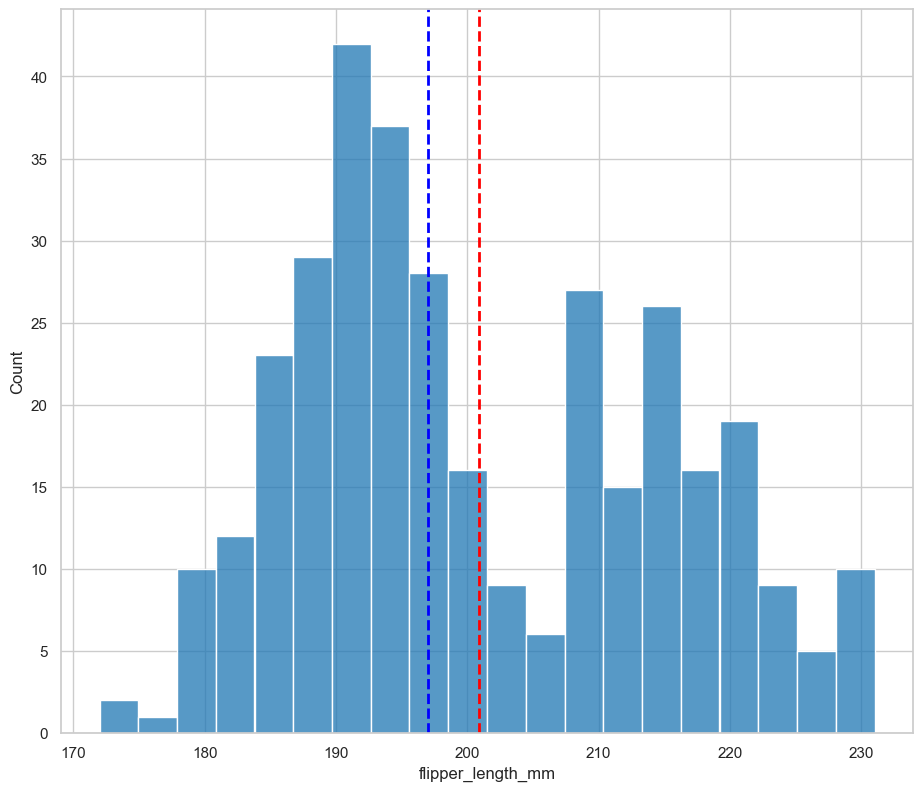

In [35]:
sns.histplot(data=df, x='flipper_length_mm', binwidth=3)
plt.axvline(x=df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=df['flipper_length_mm'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

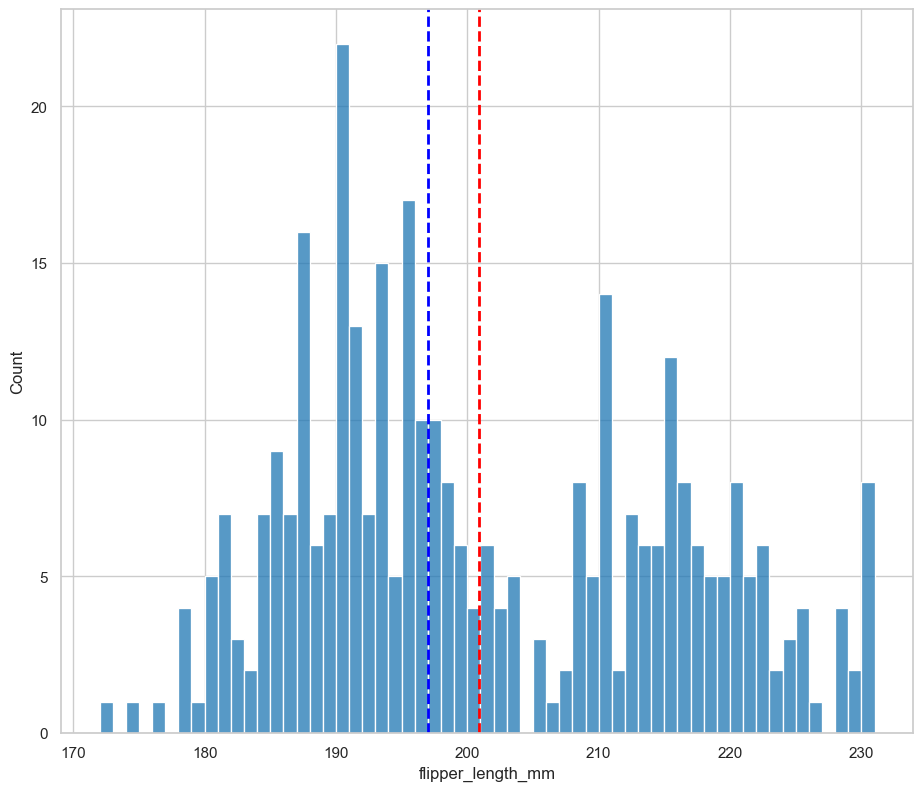

In [36]:
sns.histplot(data=df, x='flipper_length_mm', binwidth=1)
plt.axvline(x=df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=df['flipper_length_mm'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

###### Limitaciones

In [37]:
def freedman_diaconis_binwidth(x: pd.Series) -> float:
    """"Find optimal binwidth usiong Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1/3)

In [38]:
freedman_diaconis_binwidth(df['flipper_length_mm'])

6.565054727883573

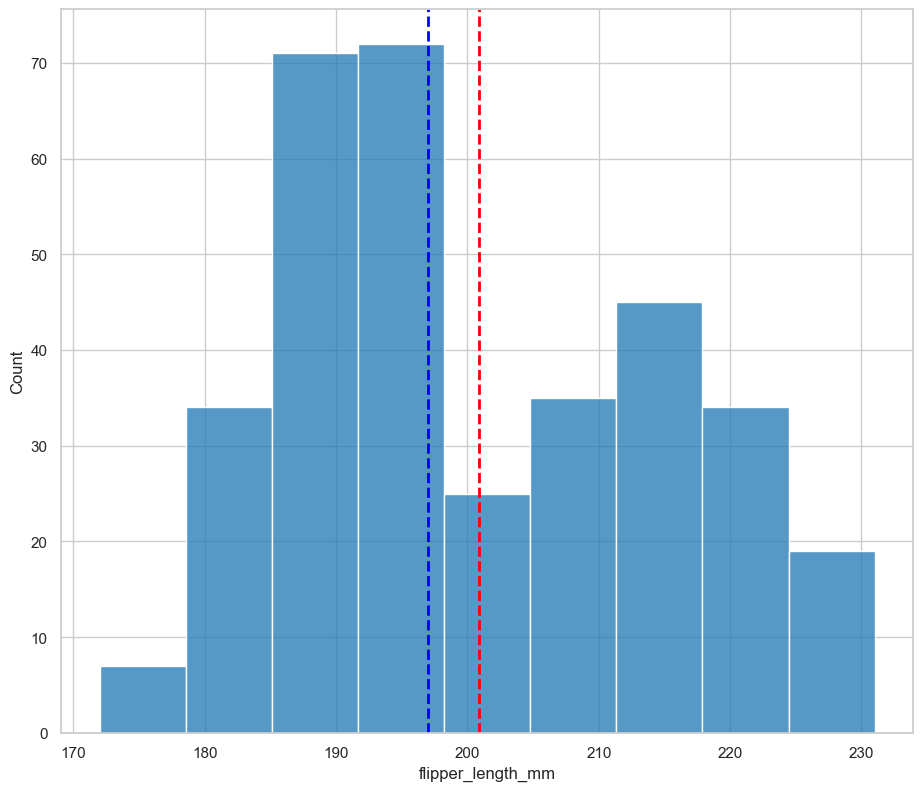

In [39]:
sns.histplot(data=df, x='flipper_length_mm', binwidth=freedman_diaconis_binwidth(df['flipper_length_mm']))
plt.axvline(x=df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=df['flipper_length_mm'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

##### Boxplot

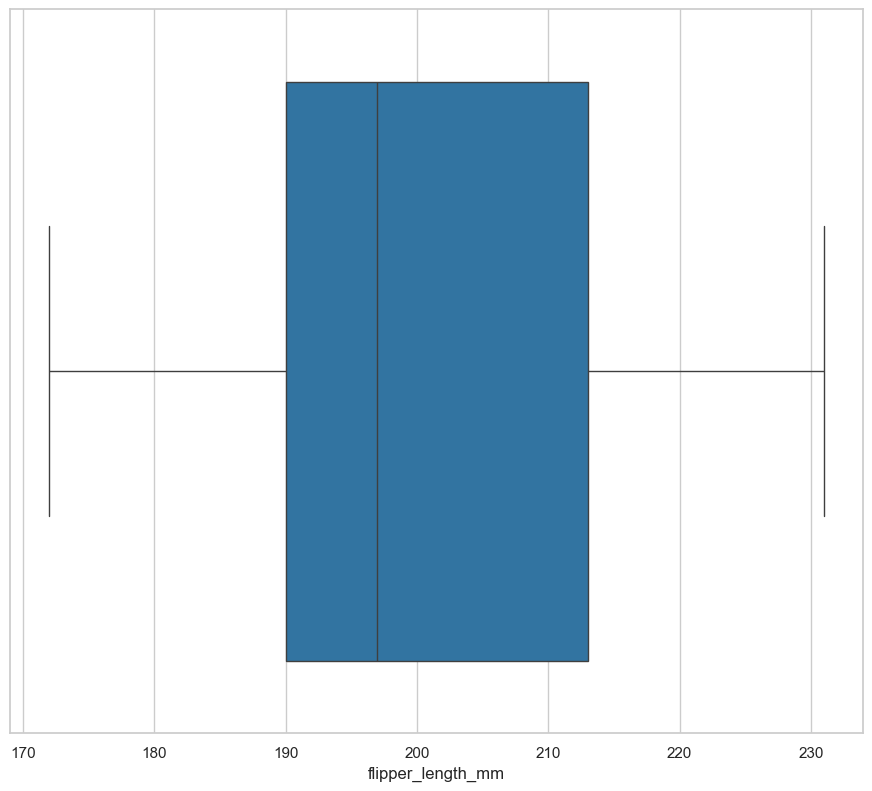

In [40]:
sns.boxplot(data=df, x='flipper_length_mm')
plt.show()

### Distribuciones

#### Funciones de densidad de probabilidad

##### Seaborn

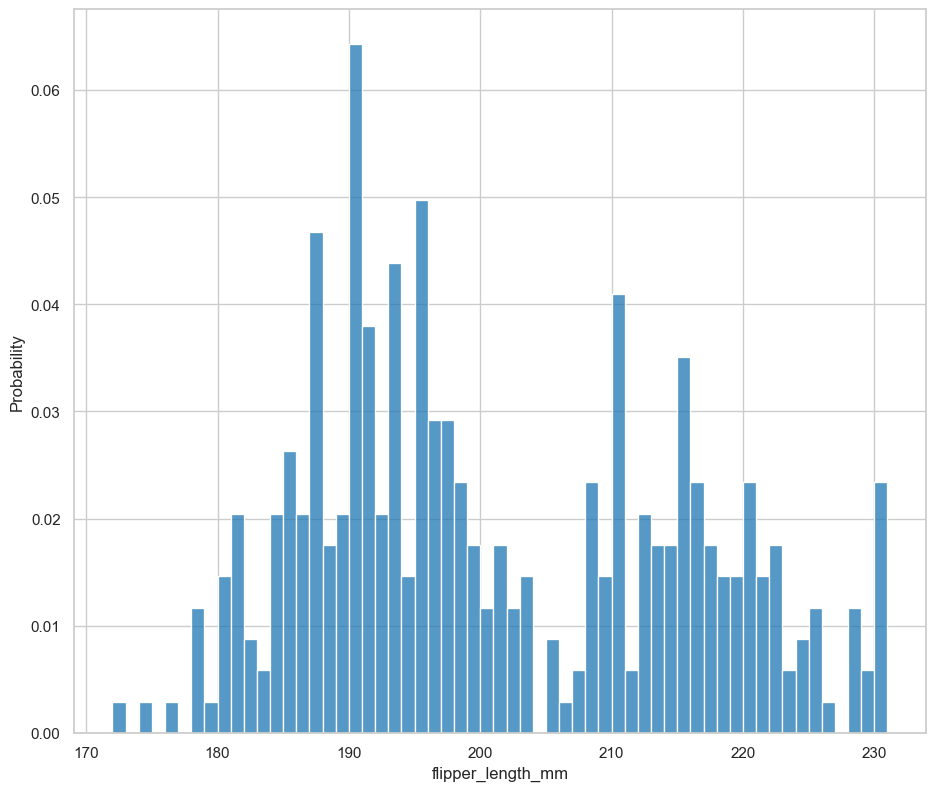

In [41]:
sns.histplot(data=df, x='flipper_length_mm', binwidth=1, stat='probability')
plt.show()

##### empiricaldist

In [42]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(df['flipper_length_mm'], normalize=True)
pmf_flipper_length_mm 

,probs
flipper_length_mm,
172.0,0.002924
174.0,0.002924
176.0,0.002924
178.0,0.011696
179.0,0.002924
180.0,0.014620
181.0,0.020468
182.0,0.008772
183.0,0.005848


In [43]:
type(pmf_flipper_length_mm)

empiricaldist.empiricaldist.Pmf

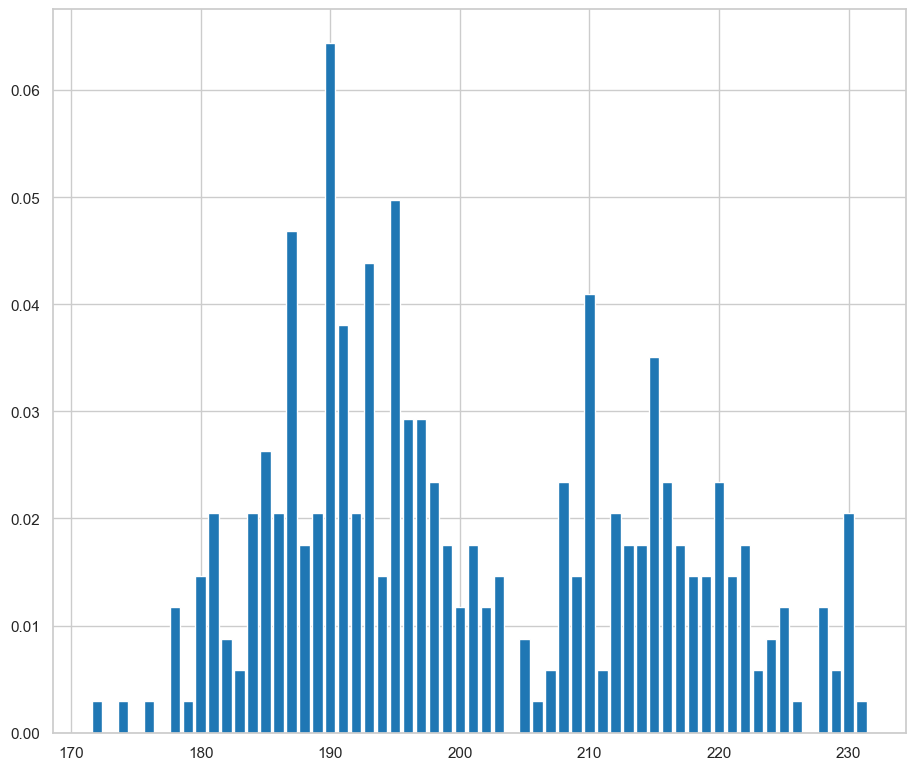

In [44]:
pmf_flipper_length_mm.bar()

In [45]:
pmf_flipper_length_mm(190)

0.06432748538011696

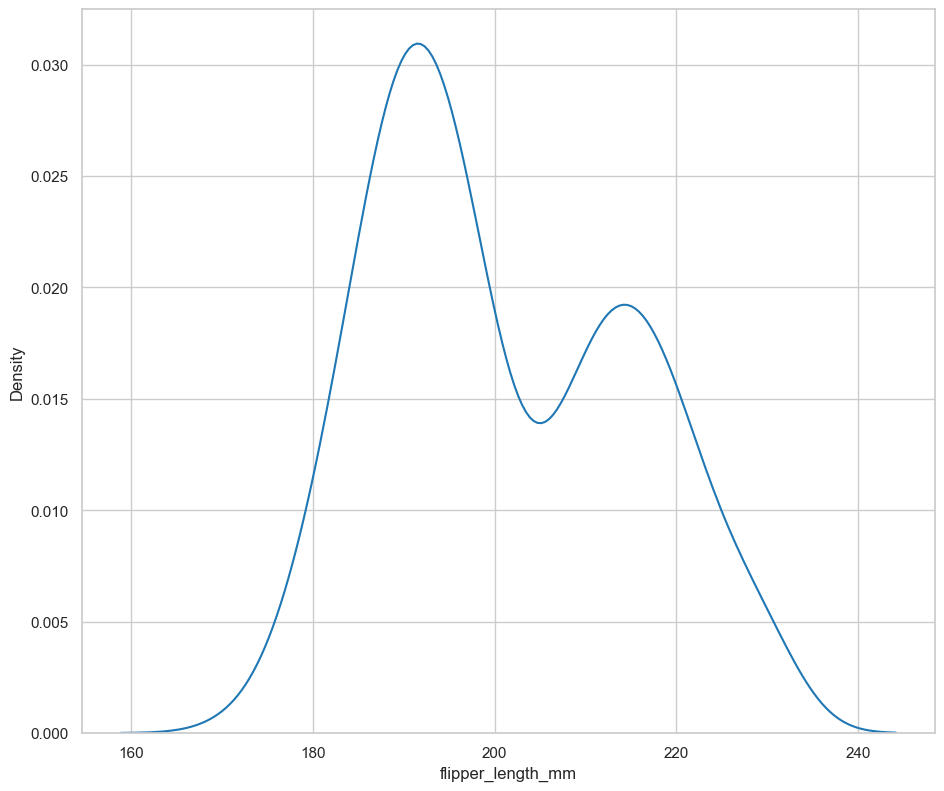

In [46]:
sns.kdeplot(data=df, x='flipper_length_mm')
plt.show()

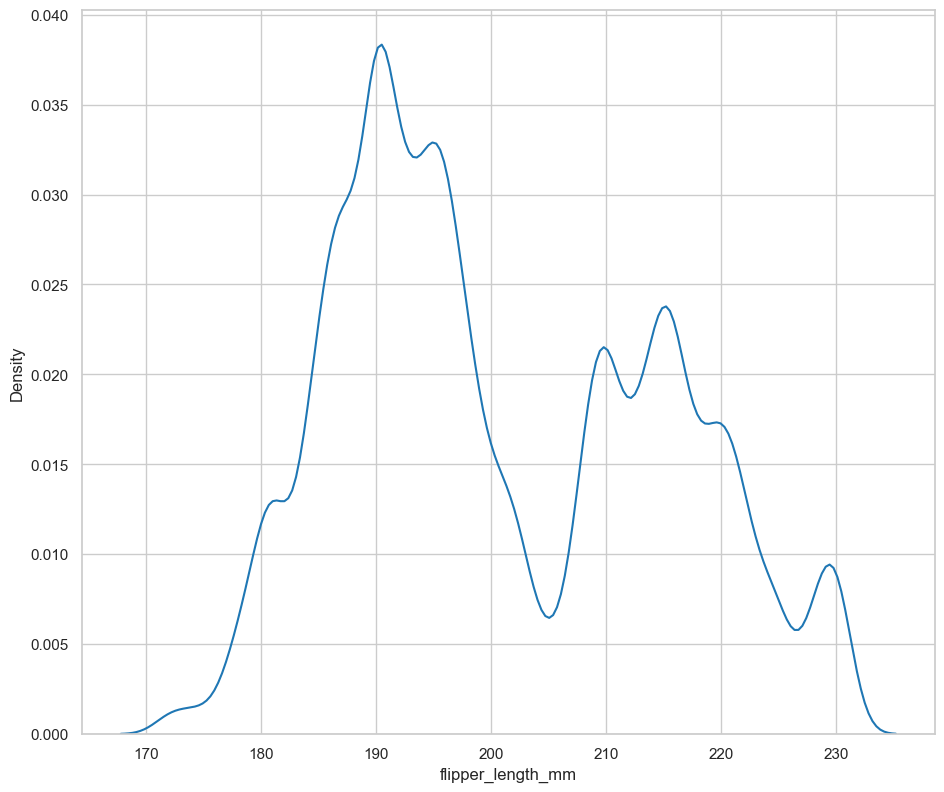

In [47]:
sns.kdeplot(data=df, x='flipper_length_mm', bw_method=0.1)
plt.show()

In [48]:
stats = df['body_mass_g'].describe()
stats

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

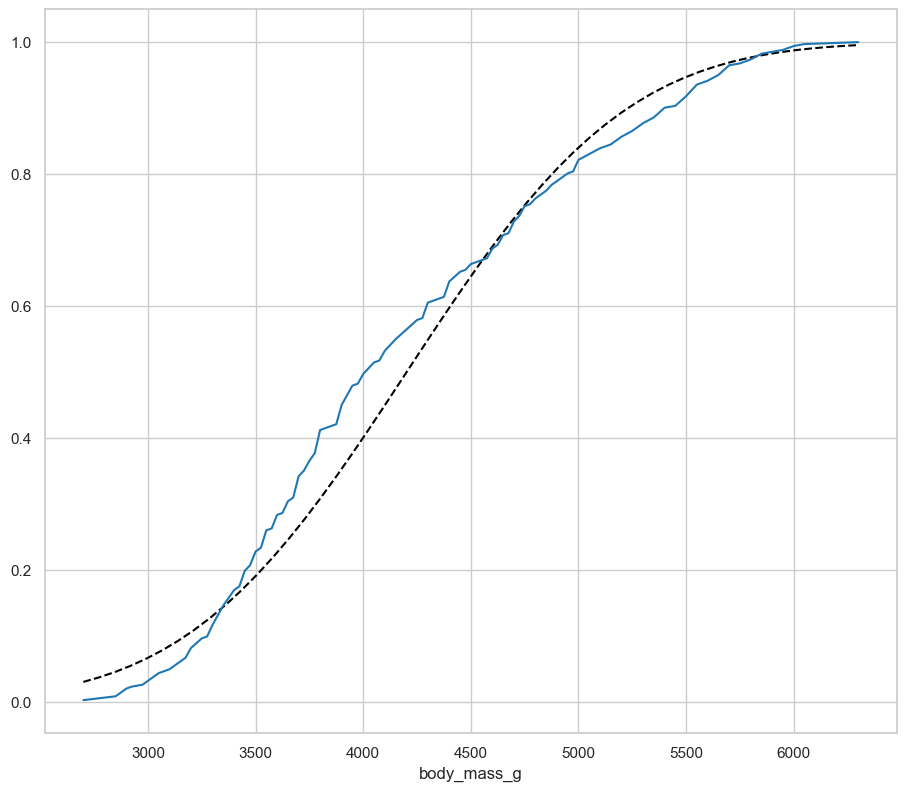

In [49]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')
empiricaldist.Cdf.from_seq(df['body_mass_g'], normalize=True).plot()

plt.show()

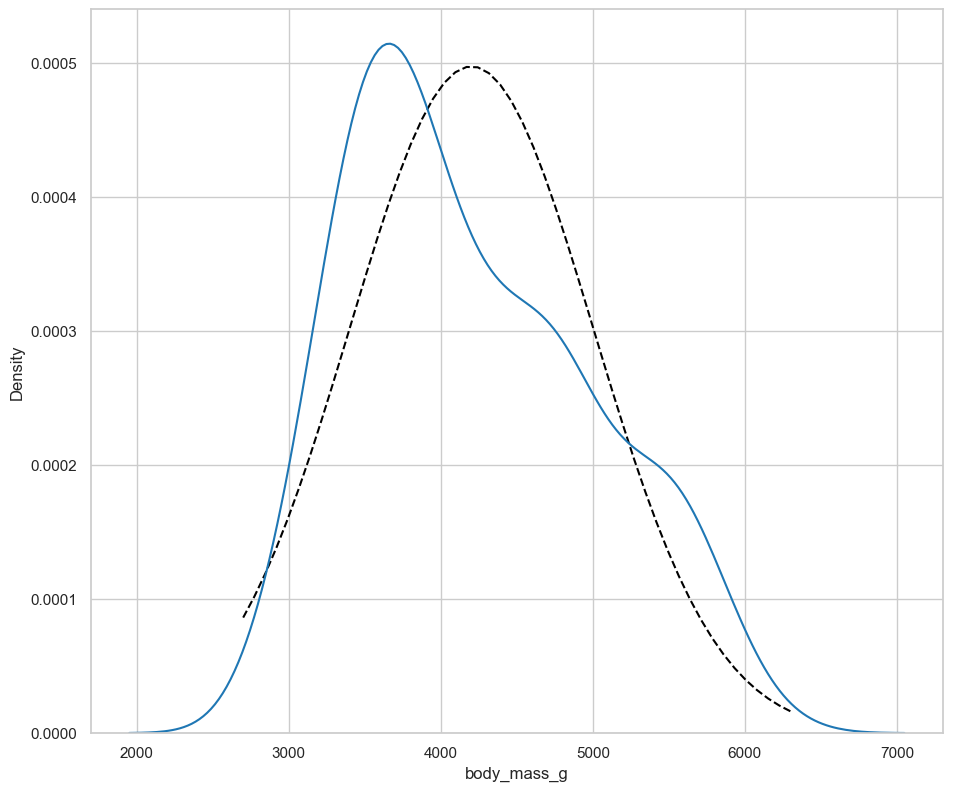

In [50]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')
sns.kdeplot(data=df, x='body_mass_g')

plt.show()

#### Funciones empirícas de probabiblidad acumulada (ECDFs)

##### Seaborn

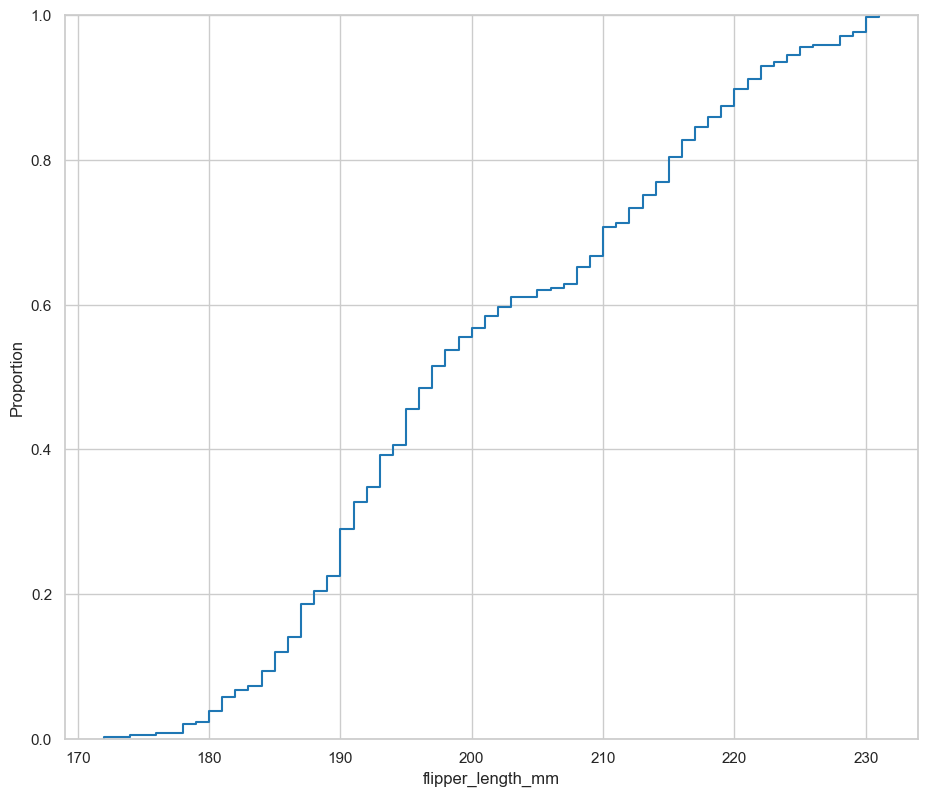

In [51]:
sns.ecdfplot(data=df, x='flipper_length_mm')
plt.show()

##### Empiricaldist

In [52]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(df['flipper_length_mm'], normalize=True)
cdf_flipper_length_mm

,probs
flipper_length_mm,
172.0,0.002924
174.0,0.005848
176.0,0.008772
178.0,0.020468
179.0,0.023392
180.0,0.038012
181.0,0.058480
182.0,0.067251
183.0,0.073099


<Axes: xlabel='flipper_length_mm'>

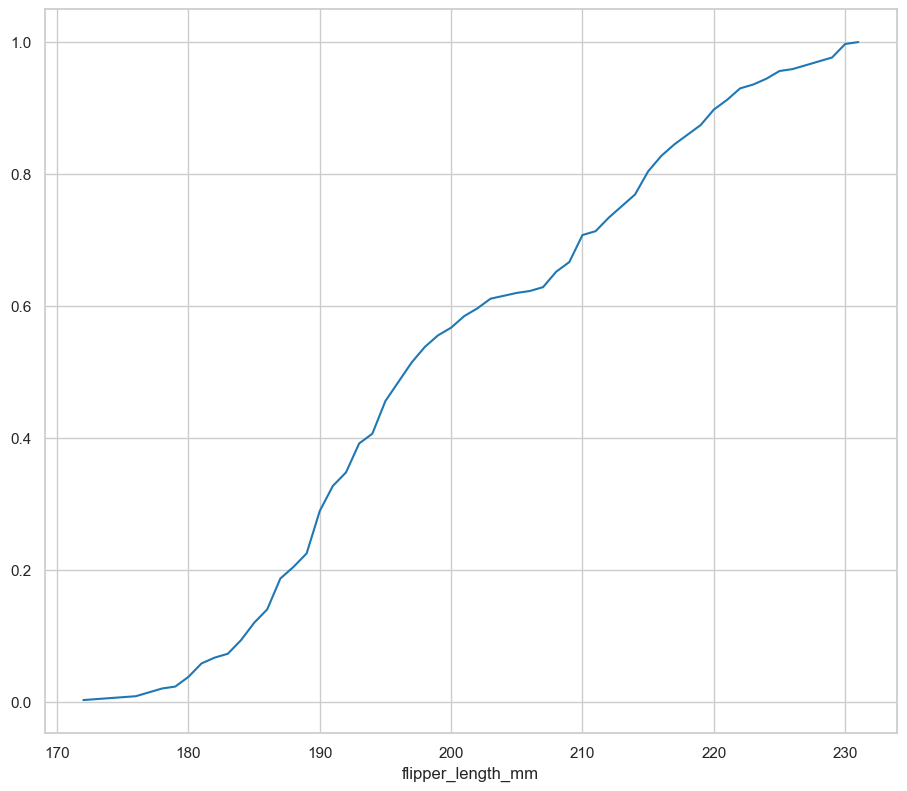

In [53]:
cdf_flipper_length_mm.plot()

In [54]:
q = 200
p = cdf_flipper_length_mm.forward(q)
print(q, p)

200 0.5672514619883041


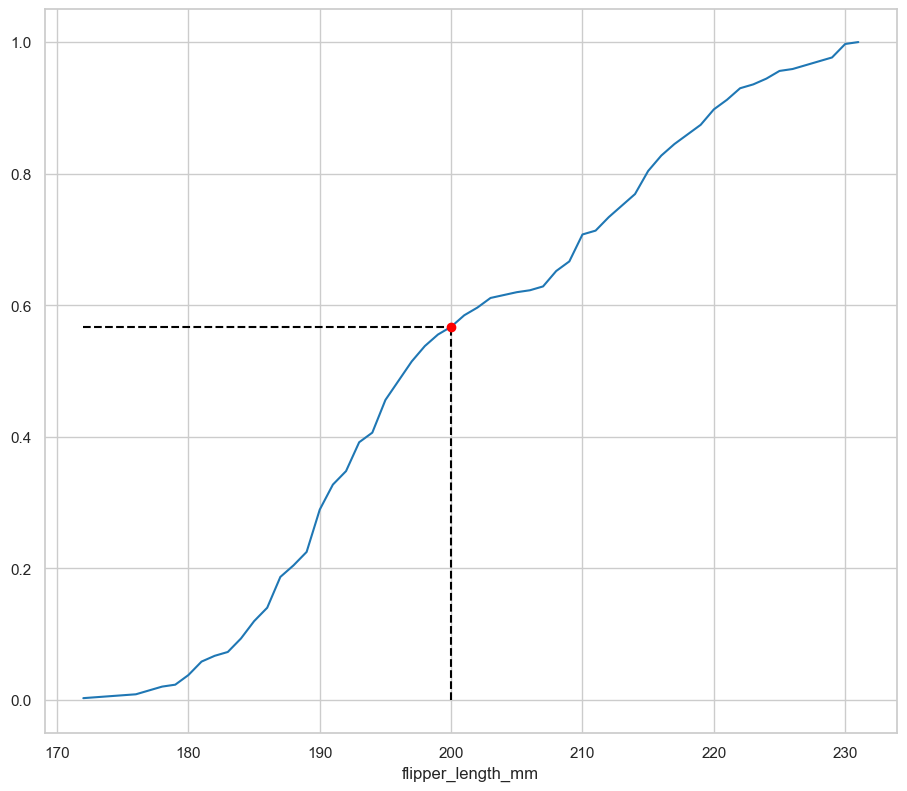

In [55]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(x=q, ymin=0, ymax=p, color='black', linestyles='dashed')
plt.hlines(y=p, xmin=pmf_flipper_length_mm.qs[0], xmax=q, color='black', linestyles='dashed')
plt.plot(q,p, 'ro')

plt.show()

#### Comparando distribuciones

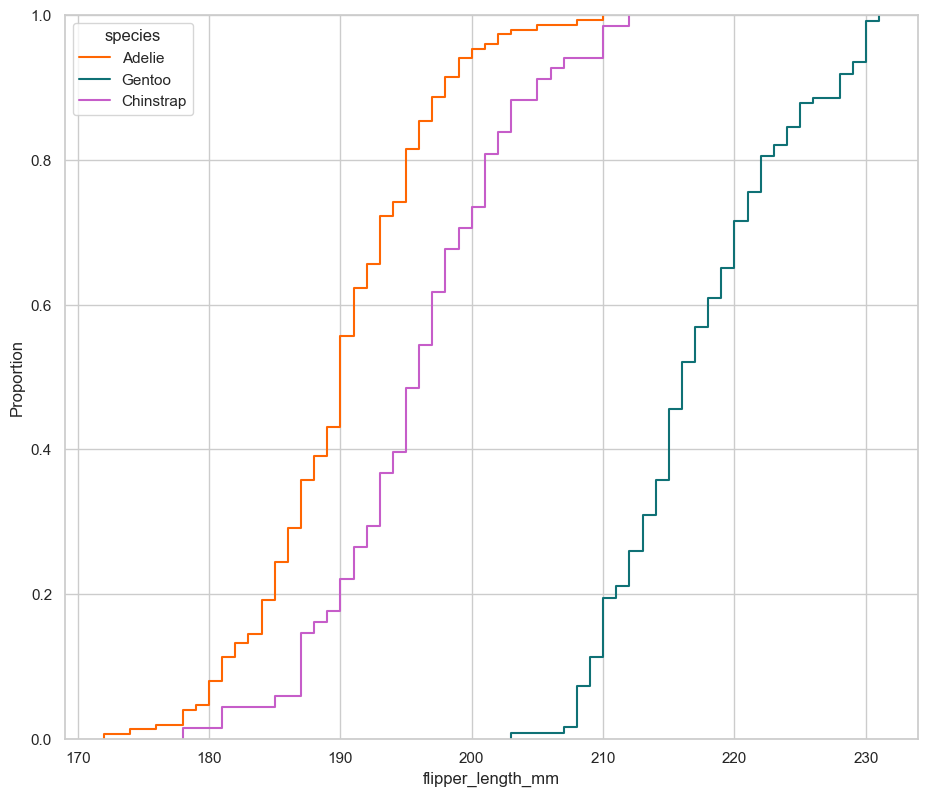

In [56]:
sns.ecdfplot(data=df, x='flipper_length_mm', hue='species', palette=penguin_color)
plt.show()

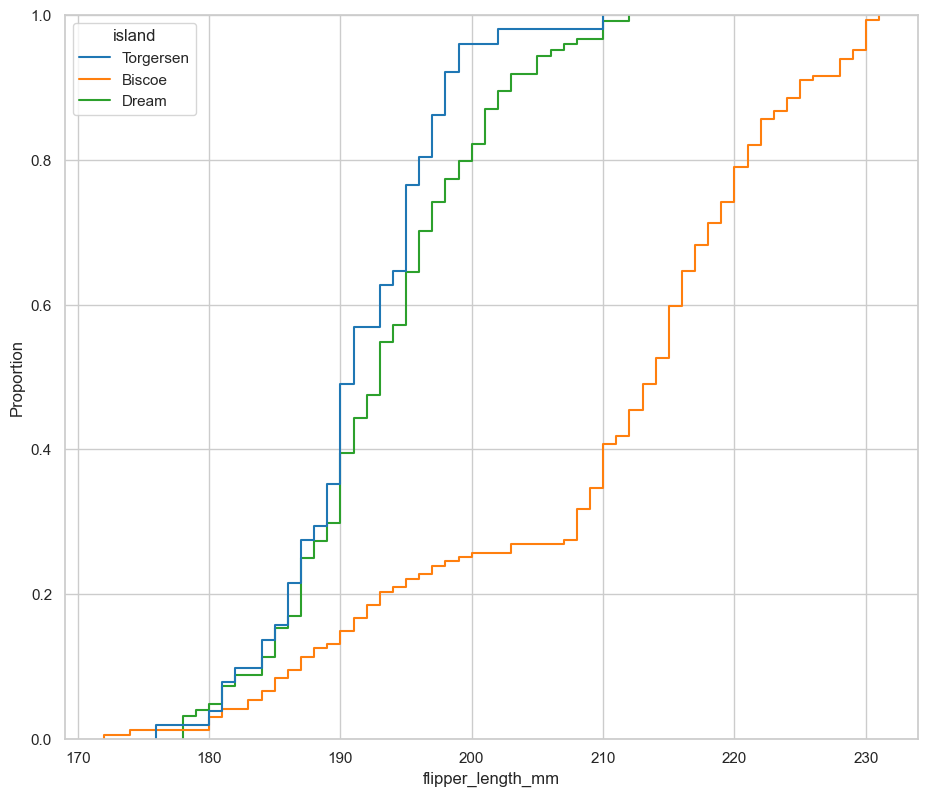

In [57]:
sns.ecdfplot(data=df, x='flipper_length_mm', hue='island')
plt.show()

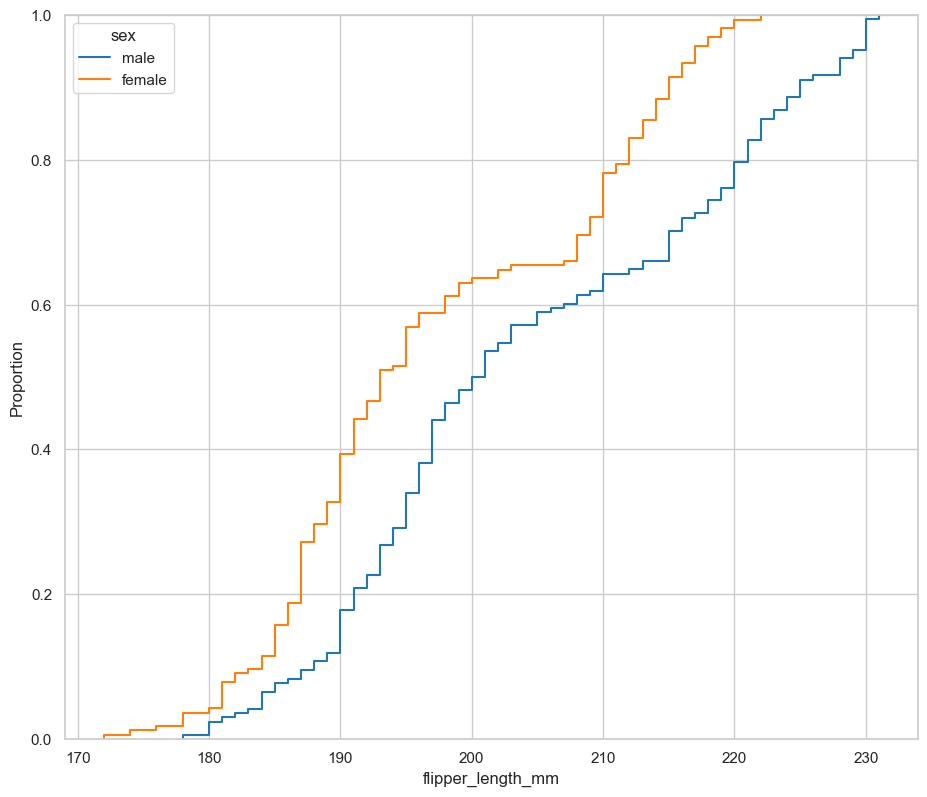

In [58]:
sns.ecdfplot(data=df, x='flipper_length_mm', hue='sex')
plt.show()

## Bonus

### Ley de los números grandes

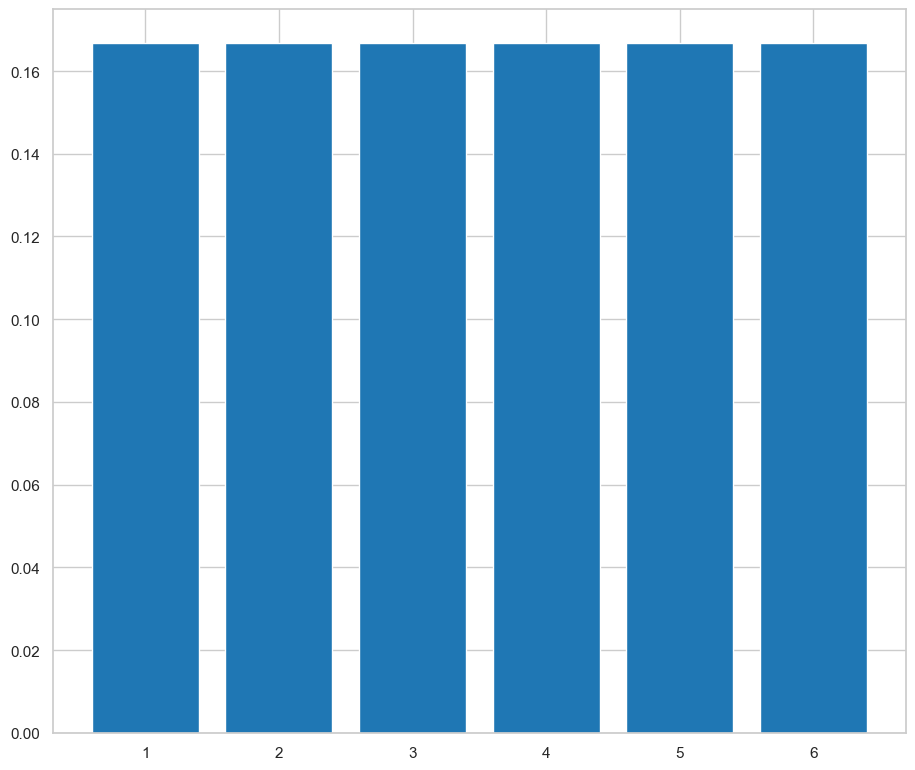

In [59]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

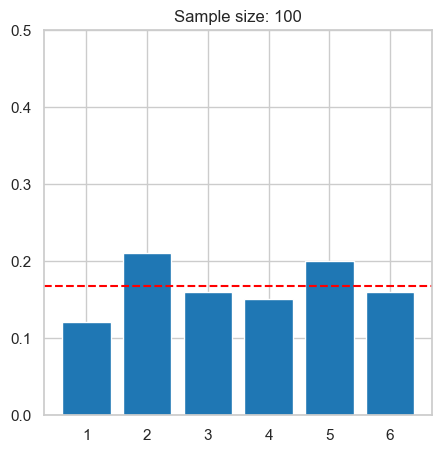

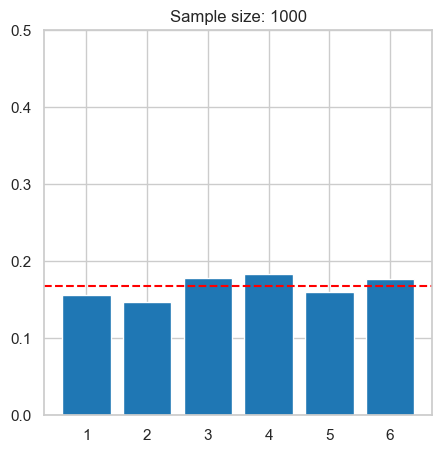

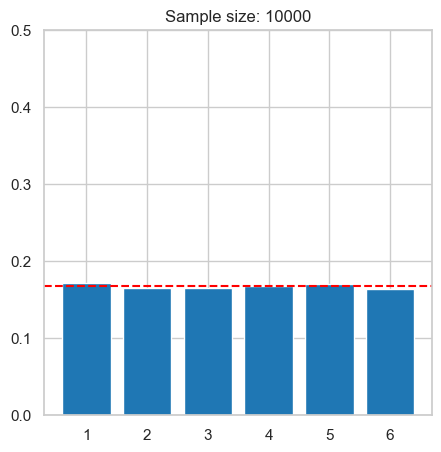

In [60]:
dice = empiricaldist.Pmf.from_seq(np.arange(1, 7))

for sample_size in [1e2, 1e3, 1e4]:
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f'Sample size: {sample_size}')
    plt.show()

### Teorema del límite central

In [61]:
df['sex'].value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [62]:
df['sex'].value_counts(normalize=True)*100

sex
male      50.45045
female    49.54955
Name: proportion, dtype: float64

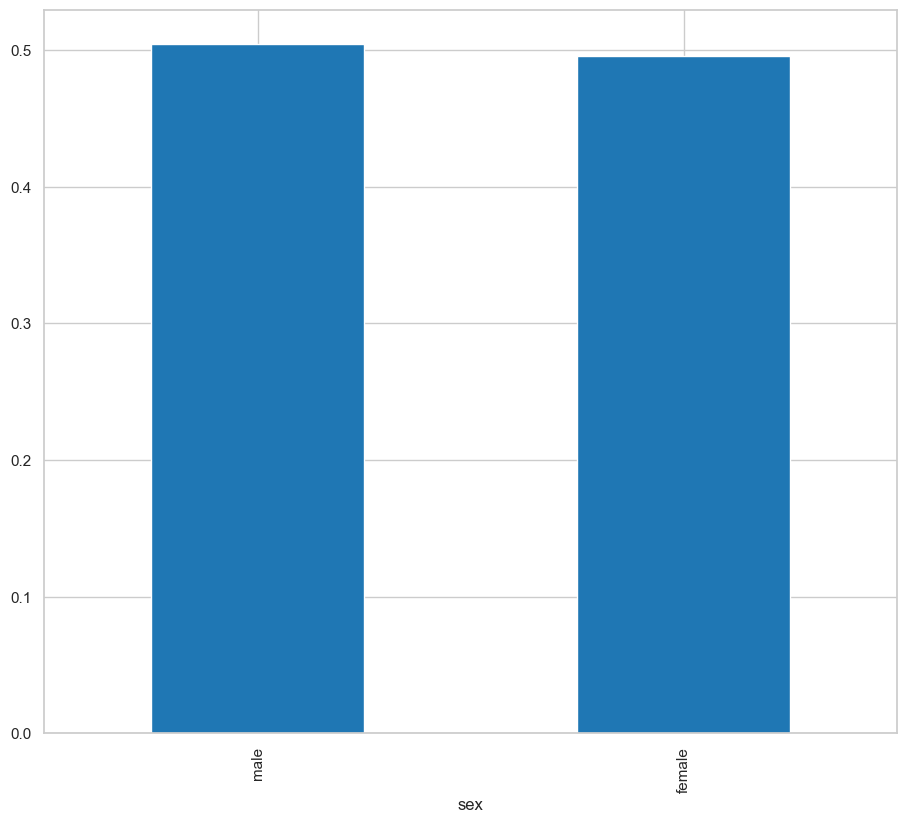

In [63]:
df['sex'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [64]:
sex_numeric = df['sex'].replace(['male', 'female'], [1,0])

C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\175481034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sex_numeric = df['sex'].replace(['male', 'female'], [1,0])


In [65]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace = True).to_numpy()
    sample_name = f'sample_{i}'
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f'Estimated percentage of male penguins in population is: {male_population_mean*100:.4f}%')

C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\1221915089.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\1221915089.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
C:\Users\usuario\AppData\Local\Temp\ipykernel_5032\1221915089.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

Estimated percentage of male penguins in population is: 50.5906%


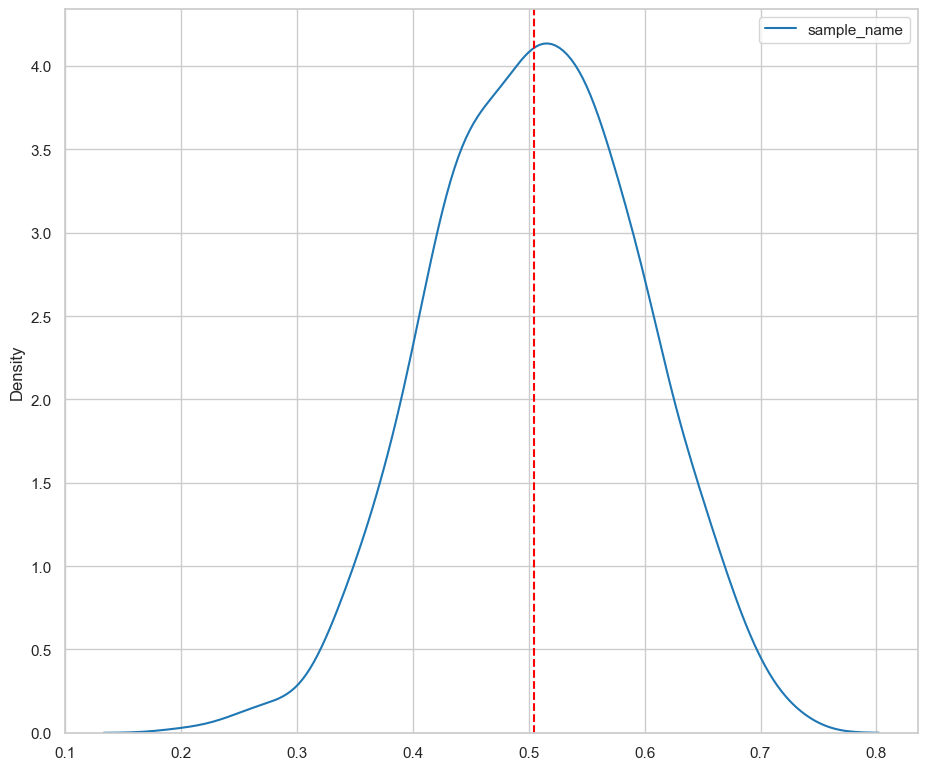

In [66]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_name'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')
plt.show()

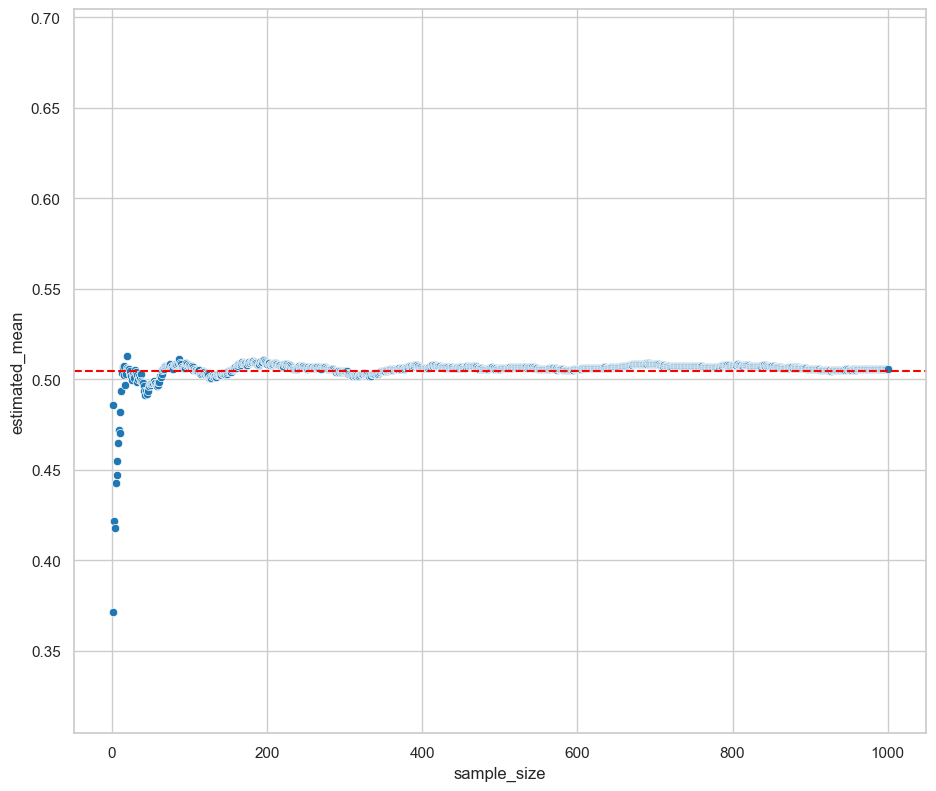

In [67]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

sns.scatterplot(data=sample_size_experiment, x='sample_size', y='estimated_mean')
plt.axhline(y=sex_numeric.mean(), color='red', linestyle='dashed')
plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.2])
plt.show()